In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
df = pd.read_csv('./DiamondsPrices.csv')
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [76]:
# 將cut、color、clarity轉成數值，並新增對應的欄位
df_encoded = pd.get_dummies(df, columns=['cut', 'color', 'clarity'], drop_first=False)

df_encoded


,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# 將資料分成訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(df_encoded.drop('price', axis=1), df_encoded['price'], test_size=0.3, random_state=42)

# 將資料標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 建立線性迴歸模型
model = LinearRegression()

# 在訓練集上進行模型訓練
model.fit(X_train_scaled, y_train)

# 輸出迴歸係數
print(model.coef_)


[ 5.33721664e+03 -9.06510241e+01 -6.18790743e+01 -1.10060113e+03
 -6.24176807e+00 -3.45820498e+01 -1.03963337e+14 -1.75323678e+14
 -2.99687008e+14 -2.66935348e+14 -2.55778243e+14  2.01051058e+14
  2.34173020e+14  2.32468535e+14  2.46453685e+14  2.20264811e+14
  1.82272346e+14  1.35059409e+14 -1.00619531e+14 -1.55382758e+14
 -3.73352448e+14 -3.25838394e+14 -3.11683530e+14 -3.64292569e+14
 -2.18903886e+14 -2.52544657e+14]


In [78]:
pd.DataFrame(model.coef_, index=df_encoded.drop('price', axis=1).columns)

,0
carat,5.337217e+03
depth,-9.065102e+01
table,-6.187907e+01
x,-1.100601e+03
y,-6.241768e+00
z,-3.458205e+01
cut_Fair,-1.039633e+14
cut_Good,-1.753237e+14
cut_Ideal,-2.996870e+14
cut_Premium,-2.669353e+14


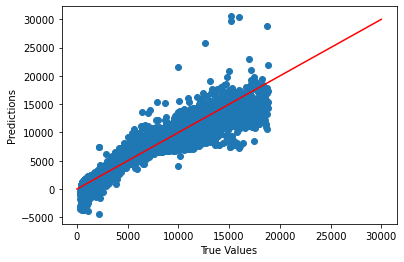

In [79]:
# 用模型進行預測
y_pred = model.predict(X_test_scaled)

# 繪製散點圖和預測直線
plt.scatter(y_test, y_pred)
plt.plot([0, 30000], [0, 30000], 'r')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

In [80]:
from sklearn.metrics import mean_squared_error, r2_score

# 預測測試集資料
y_pred = model.predict(X_test_scaled)

# 計算MSE
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

# 計算R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

MSE: 1244784.1152788883
R-squared: 0.9201854937210023


In [81]:
from sklearn.metrics import confusion_matrix

# 將預測值轉換為二元分類結果
y_pred_binary = (y_pred > 5000).astype(int)

# 將實際目標值轉換為二元分類結果
y_test_binary = (y_test > 5000).astype(int)

# 計算混淆矩陣
conf_mat = confusion_matrix(y_test_binary, y_pred_binary)

print(conf_mat)

[[11168   679]
 [   41  4294]]
